1. What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?
  - K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that uses proximity to make predictions. In classification, it assigns a new data point to the most common class among its 'k' nearest neighbors. In regression, it predicts a continuous value by averaging the values of its 'k' nearest neighbors. The algorithm works by finding the 'k' closest data points to a new point using a distance metric

2.  What is the Curse of Dimensionality and how does it affect KNN
performance?
  - The curse of dimensionality is the problem that arises when data has a very high number of features (dimensions), causing it to become sparse and making it difficult for machine learning algorithms to find patterns. This significantly harms the performance of distance-based algorithms like k-Nearest Neighbors (KNN) because as dimensions increase, the distance between all data points becomes more uniform, making the concept of "closeness" lose its meaning and causing the algorithm to become less effective.

3. What is Principal Component Analysis (PCA)? How is it different from
feature selection?
  - Principal Component Analysis (PCA) is a feature extraction technique that creates new, artificial features (principal components) by combining the original features to reduce dimensionality while maximizing variance. In contrast, feature selection is a method that works by selecting a subset of the original features and discarding the rest. PCA is unsupervised and doesn't consider a target variable, focusing instead on the variance within the data, whereas feature selection methods often use a target variable to determine which features are most relevant for a specific task.

4. What are eigenvalues and eigenvectors in PCA, and why are they
important?
  - In PCA, eigenvectors are the directions of maximum variance in the data, and eigenvalues are the magnitude of variance along those directions. They are important because they help reduce the dimensionality of data by identifying the principal components that capture the most important patterns, allowing for data compression and noise reduction while retaining most of the information.

5. How do KNN and PCA complement each other when applied in a single
pipeline?
  - When used together in a machine learning pipeline, Principal Component Analysis (PCA) and K-Nearest Neighbors (KNN) complement each other by addressing a key weakness of the KNN algorithm known as the "curse of dimensionality". PCA is used as a data preprocessing step to prepare the data for the KNN classifier, leading to improved performance, speed, and noise reduction.

Dataset:
Use the Wine Dataset from sklearn.datasets.load_wine().

6. Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Loading Wine dataset...")
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}\n")

knn = KNeighborsClassifier(n_neighbors=5)


print("--- Case 1: Training KNN without Scaling ---")
knn.fit(X_train, y_train)
y_pred_unscaled = knn.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Training complete.")
print(f"Accuracy without scaling: {accuracy_unscaled:.4f}\n")

print("--- Case 2: Training KNN with Scaling ---")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaled using StandardScaler.")

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Training complete.")
print(f"Accuracy with scaling:    {accuracy_scaled:.4f}\n")

print("=====================================================")
print("             KNN Accuracy Comparison")
print("=====================================================")
print(f"Accuracy (Unscaled): {accuracy_unscaled:.4f}")
print(f"Accuracy (Scaled):   {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_unscaled:
    print("\nResult: Scaling significantly improved performance!")
else:
    print("\nResult: Scaling had minimal or no effect.")


Loading Wine dataset...
Total samples: 178
Training samples: 124, Testing samples: 54

--- Case 1: Training KNN without Scaling ---
Training complete.
Accuracy without scaling: 0.7222

--- Case 2: Training KNN with Scaling ---
Data scaled using StandardScaler.
Training complete.
Accuracy with scaling:    0.9444

             KNN Accuracy Comparison
Accuracy (Unscaled): 0.7222
Accuracy (Scaled):   0.9444

Result: Scaling significantly improved performance!


7. Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Loading Wine dataset...")
wine = load_wine()
X = wine.data
feature_names = wine.feature_names
n_features = X.shape[1]
print(f"Original number of features: {n_features}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized using StandardScaler.\n")

pca = PCA(n_components=None)
pca.fit(X_scaled)

print("--- Explained Variance Ratio per Principal Component ---")
print(f"Total variance explained by all components: {np.sum(pca.explained_variance_ratio_):.4f}\n")

for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\n--- Cumulative Explained Variance ---")

target_variance = 0.90
components_for_90 = np.argmax(cumulative_variance >= target_variance) + 1
print(f"Components needed to capture {target_variance*100:.0f}% variance: {components_for_90}")


Loading Wine dataset...
Original number of features: 13
Data standardized using StandardScaler.

--- Explained Variance Ratio per Principal Component ---
Total variance explained by all components: 1.0000

Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080

--- Cumulative Explained Variance ---
Components needed to capture 90% variance: 8


8. Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.

In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Loading Wine dataset...")
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Original feature count: {X.shape[1]}")
print("Data standardized using StandardScaler.\n")

knn = KNeighborsClassifier(n_neighbors=5)


print("--- Case 1: KNN on Full Scaled Dataset (Baseline) ---")
knn.fit(X_train_scaled, y_train)
y_pred_baseline = knn.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Training complete.")
print(f"Accuracy on 13 features: {accuracy_baseline:.4f}\n")

n_components = 2
print(f"--- Case 2: Applying PCA to retain top {n_components} components ---")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
print(f"Data reduced to {n_components} principal components.")
print(f"Variance explained by these 2 components: {np.sum(pca.explained_variance_ratio_):.4f}\n")

print(f"--- Case 3: KNN on {n_components}-Component PCA Dataset ---")
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Training complete.")
print(f"Accuracy on {n_components} features: {accuracy_pca:.4f}\n")

print("=====================================================")
print("  Accuracy Comparison (Full vs. 2-Component PCA)")
print("=====================================================")
print(f"1. Accuracy (13 Features): {accuracy_baseline:.4f}")
print(f"2. Accuracy (2 Features):  {accuracy_pca:.4f}")


Loading Wine dataset...
Original feature count: 13
Data standardized using StandardScaler.

--- Case 1: KNN on Full Scaled Dataset (Baseline) ---
Training complete.
Accuracy on 13 features: 0.9444

--- Case 2: Applying PCA to retain top 2 components ---
Data reduced to 2 principal components.
Variance explained by these 2 components: 0.5494

--- Case 3: KNN on 2-Component PCA Dataset ---
Training complete.
Accuracy on 2 features: 0.9444

  Accuracy Comparison (Full vs. 2-Component PCA)
1. Accuracy (13 Features): 0.9444
2. Accuracy (2 Features):  0.9444


9. Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.


In [4]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Loading Wine dataset...")
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Original feature count: {X.shape[1]}")
print("Data standardized using StandardScaler.\n")

K_VALUE = 5

print(f"--- Case 1: KNN (K={K_VALUE}) with Euclidean Distance ---")
knn_euclidean = KNeighborsClassifier(n_neighbors=K_VALUE, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print("Training complete.")
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}\n")

print(f"--- Case 2: KNN (K={K_VALUE}) with Manhattan Distance ---")
knn_manhattan = KNeighborsClassifier(n_neighbors=K_VALUE, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Training complete.")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}\n")

print("=====================================================")
print(f"  Accuracy Comparison (K={K_VALUE} on Scaled Data)")
print("=====================================================")
print(f"1. Euclidean Distance Accuracy: {accuracy_euclidean:.4f}")
print(f"2. Manhattan Distance Accuracy: {accuracy_manhattan:.4f}")


Loading Wine dataset...
Original feature count: 13
Data standardized using StandardScaler.

--- Case 1: KNN (K=5) with Euclidean Distance ---
Training complete.
Accuracy with Euclidean distance: 0.9444

--- Case 2: KNN (K=5) with Manhattan Distance ---
Training complete.
Accuracy with Manhattan distance: 0.9815

  Accuracy Comparison (K=5 on Scaled Data)
1. Euclidean Distance Accuracy: 0.9444
2. Manhattan Distance Accuracy: 0.9815


10. You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
  - Use PCA to reduce dimensionality
  - Decide how many components to keep
  - Use KNN for classification post-dimensionality reduction
  - Evaluate the model
  - Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data

Loading Wine dataset (simulating high-dimensional gene expression data)...
Original Feature Count (Genes): 13
Training Samples: 124 | Testing Samples: 54

Data standardized (mean=0, std=1).

--- PCA Component Selection ---
Total variance explained by all components: 1.0000
Target variance retention: 95%
Number of components needed to retain 95%: 10

Data successfully reduced from 13 features to 10 principal components.
Variance explained by retained components: 0.9650

--- KNN Classification (K=5) on PCA Data ---
KNN training on reduced data complete.
Final Model Accuracy (on 10 features): 0.9444


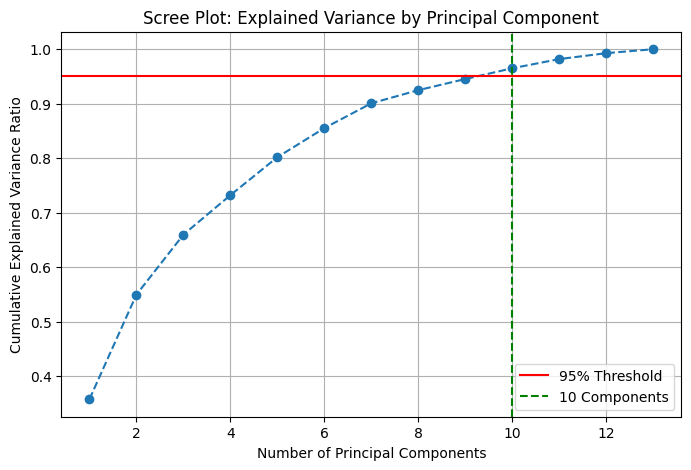

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

TARGET_VARIANCE = 0.95
K_VALUE = 5

print("Loading Wine dataset (simulating high-dimensional gene expression data)...")
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Original Feature Count (Genes): {X.shape[1]}")
print(f"Training Samples: {X_train.shape[0]} | Testing Samples: {X_test.shape[0]}\n")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data standardized (mean=0, std=1).\n")

pca = PCA(n_components=None)
pca.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

components_to_keep = np.argmax(cumulative_variance >= TARGET_VARIANCE) + 1
explained_variance_by_k = cumulative_variance[components_to_keep - 1]

print("--- PCA Component Selection ---")
print(f"Total variance explained by all components: {cumulative_variance[-1]:.4f}")
print(f"Target variance retention: {TARGET_VARIANCE:.0%}")
print(f"Number of components needed to retain {TARGET_VARIANCE:.0%}: {components_to_keep}\n")

pca_final = PCA(n_components=components_to_keep)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"Data successfully reduced from {X.shape[1]} features to {components_to_keep} principal components.")
print(f"Variance explained by retained components: {explained_variance_by_k:.4f}\n")

print(f"--- KNN Classification (K={K_VALUE}) on PCA Data ---")
knn_pca = KNeighborsClassifier(n_neighbors=K_VALUE, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("KNN training on reduced data complete.")
print(f"Final Model Accuracy (on {components_to_keep} features): {accuracy_pca:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=TARGET_VARIANCE, color='r', linestyle='-', label=f'{TARGET_VARIANCE*100:.0f}% Threshold')
plt.axvline(x=components_to_keep, color='g', linestyle='--', label=f'{components_to_keep} Components')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()
